# Exploring Dandiset 001354: Hippocampal Neuronal Responses to Programmable Antigen-Gated G-Protein-Coupled Engineered Receptor Activation

> **Note**: This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results, and verify findings independently when using for scientific analysis.

## Overview of the Dandiset

This Dandiset contains intracellular electrophysiological recordings from hippocampal CA1 neurons in mice, where neurons were genetically engineered to express programmable, antigen-gated G-protein-coupled engineered receptors (PAGERs). The purpose of the experiments was to assess neuronal activity changes in response to activation of these engineered receptors.

Dandiset URL: [https://dandiarchive.org/dandiset/001354/0.250312.0036](https://dandiarchive.org/dandiset/001354/0.250312.0036)

## What this notebook covers

In this notebook, we'll:

1. Access and explore high-level metadata about the Dandiset
2. List and understand the structure of NWB files in the Dandiset
3. Examine the organization of a single NWB file in detail
4. Visualize stimulus and response data from intracellular electrophysiology recordings
5. Extract and analyze patterns across multiple sweeps within a recording
6. Demonstrate how to summarize stimulus protocols and response characteristics

## Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pynwb
import remfile
from dandi.dandiapi import DandiAPIClient
from itertools import islice
from collections import Counter

## Accessing Dandiset Metadata

In [2]:
# Connect to the DANDI API and fetch Dandiset details
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata.get('description', 'No description available')[:100]}...")

# Display basic information about related publications
print("\nRelated publication:")
if 'relatedResource' in metadata:
    for resource in metadata['relatedResource']:
        print(f"- {resource.get('name', 'Unnamed resource')}")
        print(f"  URL: {resource.get('url', 'No URL provided')}")
        print(f"  Type: {resource.get('schemaKey', 'No type provided')}")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036
Description: This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons i...

Related publication:
- Synthetic GPCRs for programmable sensing and control of cell behaviour
  URL: https://www.nature.com/articles/s41586-024-08282-3
  Type: Resource


## Exploring NWB Files in the Dandiset

In [3]:
# List the available NWB files in the Dandiset
assets = dandiset.get_assets_by_glob("*.nwb")
asset_list = list(islice(assets, 10))

print(f"Total NWB files in Dandiset: {len(list(dandiset.get_assets_by_glob('*.nwb')))}")
print("\nFirst 10 NWB files:")
for i, asset in enumerate(asset_list, 1):
    print(f"{i}. {asset.path}")

Total NWB files in Dandiset: 50

First 10 NWB files:
1. sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb
2. sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
3. sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb
4. sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb
5. sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb
6. sub-PK-110/sub-PK-110_ses-20240723T173444_slice-2024-07-23-0010_cell-2024-07-23-0010_icephys.nwb
7. sub-PK-110/sub-PK-110_ses-20240723T195515_slice-2024-07-23-0017_cell-2024-07-23-0017_icephys.nwb
8. sub-PK-110/sub-PK-110_ses-20240723T143352_slice-2024-07-23-0003_cell-2024-07-23-0003_icephys.nwb
9. sub-PK-110/sub-PK-110_ses-20240723T185020_slice-2024-07-23-0014_cell-2024-07-23-0014_icephys.nwb
10. sub-PK-110/sub-PK-110_ses-20240723T160020_s

## Understanding the Structure of a Single NWB File

Let's look at the structure of one example file to understand the data organization.

In [4]:
# Select an example NWB file
example_asset = asset_list[0]
print(f"Examining file: {example_asset.path}")
print(f"Size: {round(example_asset.size / (1024*1024), 2)} MB")

# Load the NWB file using streaming (no download required)
remote_file = remfile.File(example_asset.download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Extract key metadata
print("\nBasic file information:")
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

print("\nSubject information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Sex: {nwb.subject.sex}")
print(f"Species: {nwb.subject.species}")
print(f"Date of birth: {nwb.subject.date_of_birth}")

print("\nExperiment-specific metadata:")
print(f"Cell ID: {nwb.lab_meta_data['DandiIcephysMetadata'].cell_id}")
print(f"Slice ID: {nwb.lab_meta_data['DandiIcephysMetadata'].slice_id}")
print(f"Targeted layer: {nwb.lab_meta_data['DandiIcephysMetadata'].targeted_layer}")

Examining file: sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb
Size: 38.43 MB


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



Basic file information:
Session description: Intracellular electrophysiology experiment.
Identifier: pk2024_07_17_0009
Session start time: 2024-07-17 18:07:19-07:00

Subject information:
Subject ID: PK-109
Sex: F
Species: Mus musculus
Date of birth: 2024-04-07 00:00:00-07:00

Experiment-specific metadata:
Cell ID: 2024_07_17_0009
Slice ID: 2024_07_17_0009
Targeted layer: CA1


### File Structure Organization

Let's explore the high-level structure of the data within the NWB file, focusing on the acquisition (responses) and stimulus data.

In [5]:
# List acquisition (response) and stimulus series
acq_keys = list(nwb.acquisition.keys())
stim_keys = list(nwb.stimulus.keys())

print(f"Number of acquisition series: {len(acq_keys)}")
print(f"Number of stimulus series: {len(stim_keys)}")
print(f"\nFirst 5 acquisition series: {acq_keys[:5]}")
print(f"First 5 stimulus series: {stim_keys[:5]}")

# Count total sweeps (pairs of stimulus/response)
print(f"\nTotal sweeps: {len(acq_keys)//2}")  # Divide by 2 because there are 2 channels per sweep

Number of acquisition series: 624
Number of stimulus series: 624

First 5 acquisition series: ['current_clamp-response-01-ch-0', 'current_clamp-response-01-ch-1', 'current_clamp-response-02-ch-0', 'current_clamp-response-02-ch-1', 'current_clamp-response-03-ch-0']
First 5 stimulus series: ['stimulus-01-ch-0', 'stimulus-01-ch-1', 'stimulus-02-ch-0', 'stimulus-02-ch-1', 'stimulus-03-ch-0']

Total sweeps: 312


This file contains numerous current clamp recordings, with each sweep consisting of both stimulus and response data for two channels (ch-0 and ch-1). The naming convention follows a pattern like `current_clamp-response-01-ch-0` for responses and `stimulus-01-ch-0` for the corresponding stimulus.

### Electrode and Recording Device Information

In [6]:
# Examine recording device and electrode information
print("Recording devices:")
for device_name, device in nwb.devices.items():
    print(f"- {device_name}: {device.description}")

print("\nIntracellular electrodes:")
for electrode_name, electrode in nwb.icephys_electrodes.items():
    print(f"- {electrode_name}: {electrode.description}")

Recording devices:
- DeviceIcephys: no description

Intracellular electrodes:
- electrode-0: no description
- electrode-1: no description


## Examining Stimulus and Response Data

Let's examine the data for the first few sweeps to understand the stimulus protocols and neural responses.

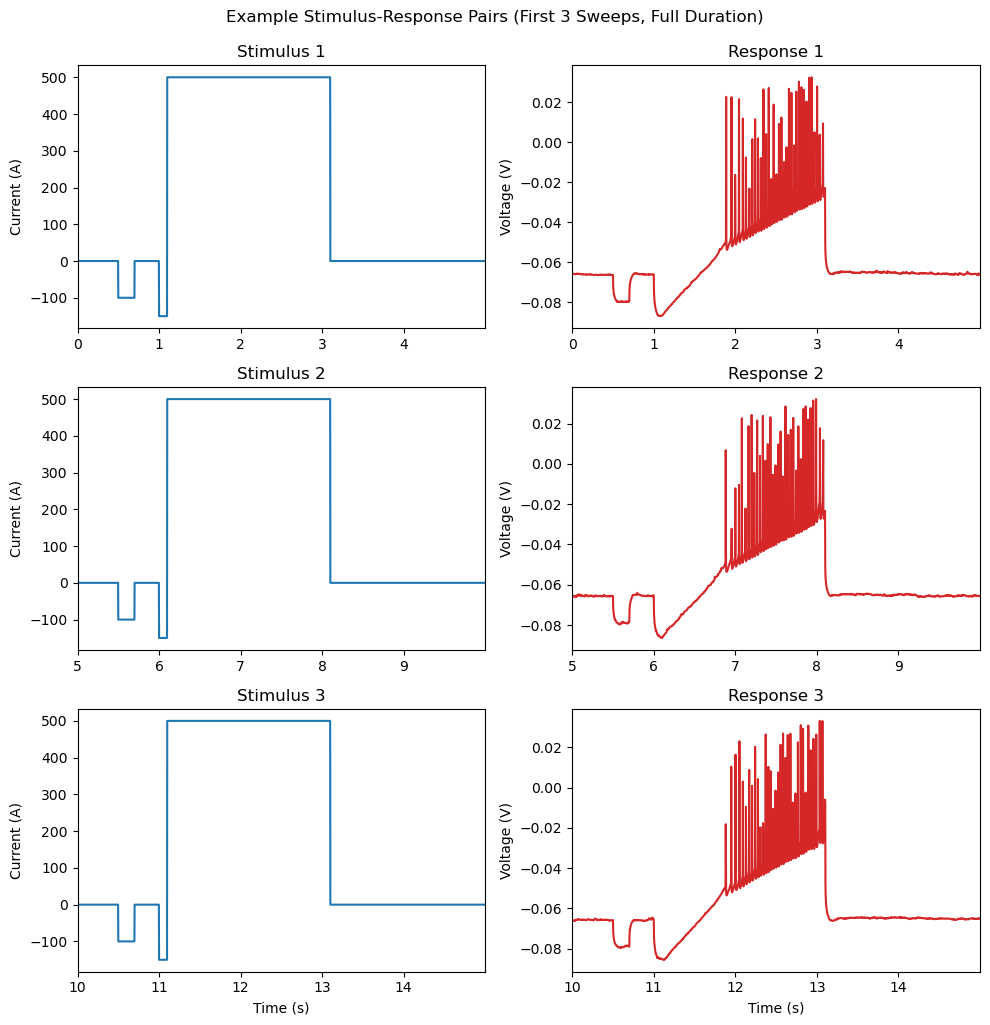

In [7]:
# Visualize first 3 stimulus-response pairs for channel 0 (full duration)
pairs = []
for i in range(1, 4):
    stim = nwb.stimulus[f'stimulus-0{i}-ch-0']
    resp = nwb.acquisition[f'current_clamp-response-0{i}-ch-0']
    pairs.append((stim, resp))

fig, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)

for idx, (stim, resp) in enumerate(pairs):
    # Full sweep durations
    stim_data = stim.data[:]
    resp_data = resp.data[:]
    stim_time = np.arange(len(stim_data)) / stim.rate + stim.starting_time
    resp_time = np.arange(len(resp_data)) / resp.rate + resp.starting_time
    # Downsample for plotting
    ds_factor = 50  # 20kHz -> 400 Hz, sufficient for macro view
    axes[idx,0].plot(stim_time[::ds_factor], stim_data[::ds_factor], color='tab:blue')
    axes[idx,0].set_ylabel('Current (A)')
    axes[idx,0].set_title(f'Stimulus {idx+1}')
    axes[idx,1].plot(resp_time[::ds_factor], resp_data[::ds_factor] * resp.conversion, color='tab:red')
    axes[idx,1].set_ylabel('Voltage (V)')
    axes[idx,1].set_title(f'Response {idx+1}')
    axes[idx,0].set_xlim(stim_time[0], stim_time[-1])
    axes[idx,1].set_xlim(resp_time[0], resp_time[-1])
    
axes[-1,0].set_xlabel('Time (s)')
axes[-1,1].set_xlabel('Time (s)')
plt.tight_layout()
plt.suptitle('Example Stimulus-Response Pairs (First 3 Sweeps, Full Duration)', y=1.02)
plt.show()

The plots above show three example stimulus-response pairs:

- **Left column**: Shows the current injection protocol (stimulus) for each sweep.
- **Right column**: Shows the membrane voltage response recorded from the neuron.

Each sweep contains both a stimulus and its corresponding neural response. We can see that the protocol uses a step current followed by a sustained plateau, which elicits action potentials and other voltage responses in the neuron.

## Understanding Stimulus Protocol Structure

Let's characterize the stimulus protocols used in this dataset to better understand the experimental design.

In [8]:
# Scan stimulus series to understand protocol types and durations
stim_types = []
stim_durations = []
stim_channels = []

for k in stim_keys:
    stim = nwb.stimulus[k]
    stim_types.append(stim.description)
    stim_durations.append(len(stim.data) / stim.rate)
    if '-ch-1' in k:
        stim_channels.append(1)
    else:
        stim_channels.append(0)

# Summarize protocol types and durations
stim_type_counts = Counter(stim_types)
stim_dur_arr = np.array(stim_durations)

print("Stimulus protocol summary:")
print(f"Total sweeps: {len(stim_keys)//2}")  # Two channels per sweep
print(f"Stimulus types: {dict(stim_type_counts)}")
print(f"Min duration: {np.min(stim_dur_arr):.1f} s")
print(f"Max duration: {np.max(stim_dur_arr):.1f} s")
print(f"Mean duration: {np.mean(stim_dur_arr):.1f} s")
print(f"Channel structure example: {stim_channels[:8]}")  # Shows channel pattern

Stimulus protocol summary:
Total sweeps: 312
Stimulus types: {'Stim type: ramp': 624}
Min duration: 5.0 s
Max duration: 5.0 s
Mean duration: 5.0 s
Channel structure example: [0, 1, 0, 1, 0, 1, 0, 1]


All the sweeps use a uniform "ramp" stimulus protocol with the same duration (5 seconds), which provides consistency for comparing responses across trials.

## Examining Response Patterns Across Sweeps

Let's examine the patterns of neural responses across multiple sweeps to understand the variability and consistency of the recordings.

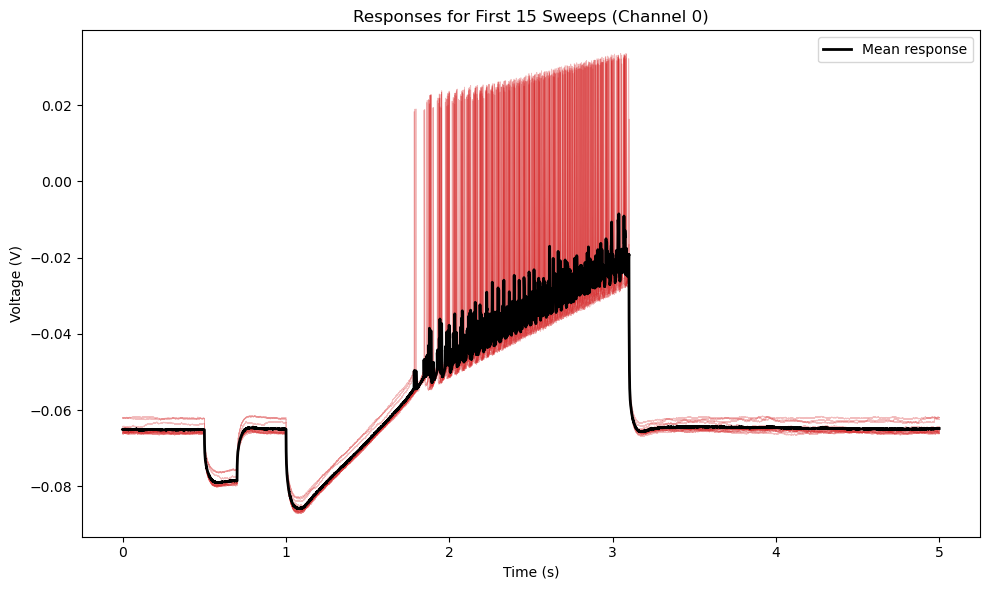

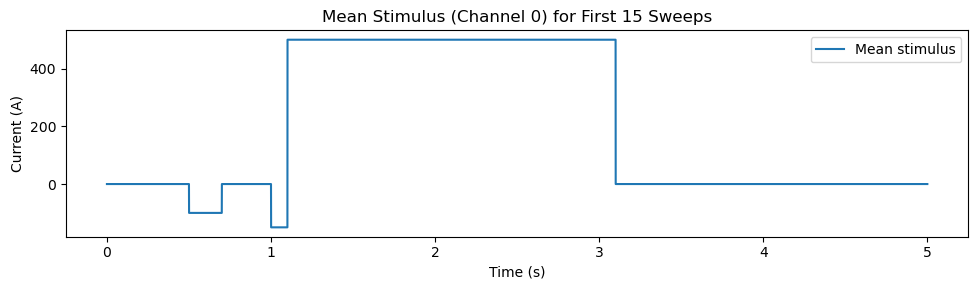

In [9]:
# Plot overlay of first 15 response sweeps for channel 0
n_sweeps = 15
responses = []
stimuli = []
time = None

for i in range(1, n_sweeps+1):
    stim_key = f'stimulus-{i:02d}-ch-0' if i < 100 else f'stimulus-{i}-ch-0'
    resp_key = f'current_clamp-response-{i:02d}-ch-0' if i < 100 else f'current_clamp-response-{i}-ch-0'
    stim = nwb.stimulus[stim_key]
    resp = nwb.acquisition[resp_key]
    stim_data = stim.data[:]
    resp_data = resp.data[:] * resp.conversion
    stimuli.append(stim_data)
    responses.append(resp_data)
    if time is None:
        time = np.arange(len(stim_data)) / stim.rate + stim.starting_time

responses = np.array(responses)
stimuli = np.array(stimuli)

plt.figure(figsize=(10, 6))
for r in responses:
    plt.plot(time, r, color='tab:red', alpha=0.3, linewidth=0.6)
plt.plot(time, np.mean(responses, axis=0), color='black', label='Mean response', linewidth=2)
plt.title('Responses for First 15 Sweeps (Channel 0)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(time, np.mean(stimuli, axis=0), color='tab:blue', label='Mean stimulus')
plt.title('Mean Stimulus (Channel 0) for First 15 Sweeps')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.tight_layout()
plt.show()

The overlay plot shows the responses from 15 individual sweeps along with their mean (in black). This provides insights into:

1. The consistency of the neural responses across multiple trials
2. The timing and pattern of action potentials in relation to the stimulus
3. The overall shape of the membrane potential change during the current ramp

The bottom plot shows the mean stimulus waveform for these 15 sweeps.

## Extracting Cell and Sweep-Level Metadata

For systematic analysis across files and sweeps, it's important to extract and organize metadata at both the cell and sweep levels.

In [10]:
# Extract comprehensive metadata for the example file
meta = {
    'session_description': nwb.session_description,
    'identifier': nwb.identifier,
    'file_create_date': str(nwb.file_create_date[0]),
    'session_start_time': str(nwb.session_start_time),
    'subject_id': nwb.subject.subject_id,
    'subject_sex': nwb.subject.sex,
    'subject_species': nwb.subject.species,
    'subject_birth': str(nwb.subject.date_of_birth),
    'cell_id': nwb.lab_meta_data['DandiIcephysMetadata'].cell_id,
    'slice_id': nwb.lab_meta_data['DandiIcephysMetadata'].slice_id,
    'targeted_layer': nwb.lab_meta_data['DandiIcephysMetadata'].targeted_layer
}

for key, value in meta.items():
    print(f"{key}: {value}")

session_description: Intracellular electrophysiology experiment.
identifier: pk2024_07_17_0009
file_create_date: 2025-03-07 17:42:47.161274-08:00
session_start_time: 2024-07-17 18:07:19-07:00
subject_id: PK-109
subject_sex: F
subject_species: Mus musculus
subject_birth: 2024-04-07 00:00:00-07:00
cell_id: 2024_07_17_0009
slice_id: 2024_07_17_0009
targeted_layer: CA1


## Summary and Next Steps

This notebook has introduced the structure and content of Dandiset 001354, which contains intracellular recordings from hippocampal neurons expressing engineered receptors (PAGERs).

We've explored:
- The high-level metadata and organization of the Dandiset
- The structure of individual NWB files and their metadata
- Stimulus and response data for example sweeps
- Patterns and consistencies across multiple sweeps

For further exploration, researchers could:
- Compare responses across different cells/animals
- Quantify specific electrophysiological features (firing rate, action potential amplitude, etc.)
- Relate responses to specific experimental conditions or genotypes
- Perform statistical analyses across the population of recorded cells